<a href="https://colab.research.google.com/github/jaimegonzalezc/KC-NLP-Practica/blob/main/PracticaNLP-3%264-Entrenamiento%26Conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Natural Language Processing - KeepCoding

## 3. Entrenamiento de modelos
Una vez con los datos preprocesados vamos a entrenar dos modelos distintos para comparar los resultados y quedarnos con el mejor modelo.

Para ello, en primer lugar tendremos que codificar los datos que hemos procesado para convertirlos en vectores y después dividir los datos de entrada en train y test.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
data = pd.read_csv('/content/drive/MyDrive/Bootcamp IA/NLP/Práctica/reviews_preprocesadas.csv')

Para la variable objetivo, se trara de un problema de clasificación binaria, por lo que necesitamos definir las clases para poder entrenar el modelo. Para definir las clases, vamos a elegir la comparación realizada en el primer ejercicio, es decir, diremos que una reseña es buena si tiene un valor superior a 3 y para reseñas con valores 1,2,3 diremos que son reseñas malas.

In [4]:
def clasificar_sentimiento(overall):
    if overall > 3:
        return 'good'
    else:
        return 'bad'

data['sentiment'] = data['overall'].apply(clasificar_sentimiento)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(data[['overall', 'sentiment']].head(10))


   overall sentiment
0        5      good
1        5      good
2        5      good
3        5      good
4        4      good
5        5      good
6        3       bad
7        5      good
8        5      good
9        5      good


Una vez cargados los datos ya preprocesados, vamos a vectorizar:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewerID            64706 non-null  object
 1   asin                  64706 non-null  object
 2   reviewerName          64529 non-null  object
 3   helpful               64706 non-null  object
 4   reviewText            64705 non-null  object
 5   overall               64706 non-null  int64 
 6   summary               64704 non-null  object
 7   unixReviewTime        64706 non-null  int64 
 8   reviewTime            64706 non-null  object
 9   reviewText_procesado  64703 non-null  object
 10  sentiment             64706 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.4+ MB


He hecho una revisión ya que me he dado cuenta de que si había algún valor vacío, por lo que se han eliminado antes de vectorizar.

In [6]:
vectorizer = CountVectorizer(max_features=5000)
data = data.dropna(subset=['reviewText_procesado']) # Eliminamos valores nulos
X = vectorizer.fit_transform(data['reviewText_procesado']).toarray()
y = data['sentiment']

Para vectortizar se ha establecido el límite de características en 5000.

Dividimos en subconjuntos de Train y Test:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos los modelos:

In [ ]:
"""c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train, y_train)

    train_predict = lr.predict(X_train)
    test_predict = lr.predict(X_test)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))"""

Accuracy for C=0.01: 0.8568889575766943
Accuracy for C=0.05: 0.8651572521443475


Tras un rato entrenando el modelo de regresión logística comparando los distintos valores de C, se ha descartado esta opción ya que debido al tamaño del dataset se acababa con la memoria de google collab bastante rápido.

En cualquier caso, se ha visto que la accuracy con C=0.01 es bastante buena, por lo que parece que el conjunto de datos es bastante bueno de por si, por lo que se van a simplificar los modelos para no acabar con la memoria disponible y obtener buenos resultados igualmente.

En cuanto a los modelos elegidos, se ha escogido basándome en la experiencia previa en modelos anteriores del bootcamp y en estudios completos analizados en Kagle.

Se ha seleccionado:
* Regresión Logística por eficiencia y simplicidad así como el buen rendimiento que tiene en datos linealmente separables, como es el caso.
* Random Forest por robustez y buen rendimiento en proyectos anteriores.

In [20]:

# Modelo 1: Regresión Logística
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

# Modelo 2: Random Forest
model2 = RandomForestClassifier(class_weight='balanced')
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(class_weight='balanced')

## 4. Reporte de métricas y conclusiones
Finalmente se considera que generar un nuevo notebook para las métricas y conclusiones puede ser un poco redundante puesto que habría que entrenar de nuevo los modelos en el nuevo notebook y el código estaría duplicado.

Por ello, las métricas y conclusiones se van a incluir en este mismo notebook.

In [21]:
from sklearn.metrics import classification_report

# Evaluación del Modelo 1ç
y_pred1 = model1.predict(X_test)
print("Evaluación del Modelo 1: Regresión Logística")
print(classification_report(y_test, y_pred1))

# Evaluación del Modelo 2
y_pred2 = model2.predict(X_test)
print("Evaluación del Modelo 2: Bosques Aleatorios")
print(classification_report(y_test, y_pred2))


Evaluación del Modelo 1: Regresión Logística
              precision    recall  f1-score   support

         bad       0.49      0.74      0.59      2479
        good       0.93      0.82      0.87     10462

    accuracy                           0.80     12941
   macro avg       0.71      0.78      0.73     12941
weighted avg       0.85      0.80      0.82     12941

Evaluación del Modelo 2: Bosques Aleatorios
              precision    recall  f1-score   support

         bad       0.82      0.22      0.35      2479
        good       0.84      0.99      0.91     10462

    accuracy                           0.84     12941
   macro avg       0.83      0.60      0.63     12941
weighted avg       0.84      0.84      0.80     12941



Viendo a primera vista estas métricas, podemos decir que el modelo que mejor rendimiento tiene en este problema es la regresión logística aunque tiene una precisión más baja para la clase "bad", su recall y F1-score son significativamente mejores, lo que lo hace más equilibrado y efectivo para este problema.

Para sacar conclusiones más dtalladas, se va a graficar estas métricas para comparar de forma directa. Para ellos se han generado dos nuevas funciones para generar:
 * Un gráfico de barras para las métricas
 * Una matriz de confusión

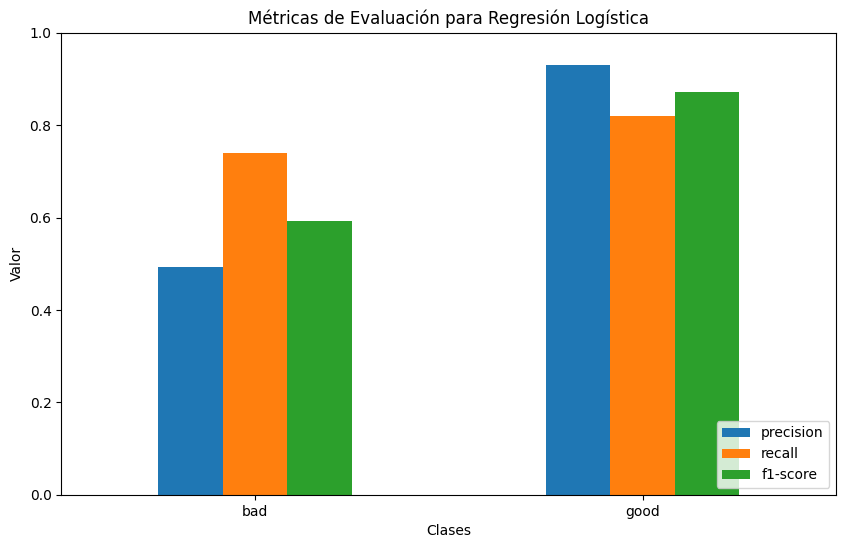

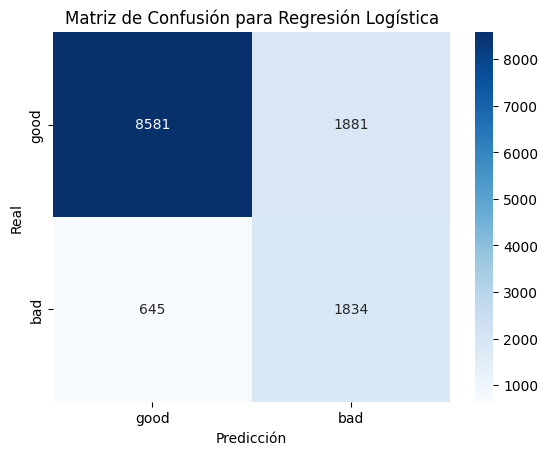

In [22]:
def graficar_metricas(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()
    metrics_df = metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3]

    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Métricas de Evaluación para {model_name}')
    plt.xlabel('Clases')
    plt.ylabel('Valor')
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.show()

def graficar_matriz_confusion(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=['good', 'bad'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluación del Modelo 1: Regresión Logística
graficar_metricas('Regresión Logística', y_test, y_pred1)
graficar_matriz_confusion('Regresión Logística', y_test, y_pred1)

Vemos que el F1-score para ambas clases es razonablemente alto, lo que sugiere un buen equilibrio entre precisión y recall.

La matriz de confusión muestra que el modelo tiene un mayor número de predicciones correctas para la clase "good" en comparación con la clase "bad". Sin embargo, hay una cantidad considerable de falsos negativos para la clase "good" y falsos positivos para la clase "bad", lo que sugiere que hay margen de mejora en la identificación de la clase "bad".

El modelo de regresión logística muestra un buen rendimiento general, especialmente en la identificación de reseñas positivas. Aunque, como hemos comentado, hay margen de mejora en la identificación de reseñas negativas, el modelo es equilibrado y efectivo para este problema de clasificación binaria supervisada. Basado en las métricas y la matriz de confusión, el modelo de regresión logística es una opción sólida para el análisis de sentimiento en este conjunto de datos.

Para mejorar el rendimiento de la clase "bad" podría realizarse ingeniería de características como es el ejemplo de TF-IDF para modificar el vectorizer y dar más peso a las palabras más importantes pero menos frecuentes, pero se ha descartado por la limitación de memoria de Google Collab tras algunas pruebas.

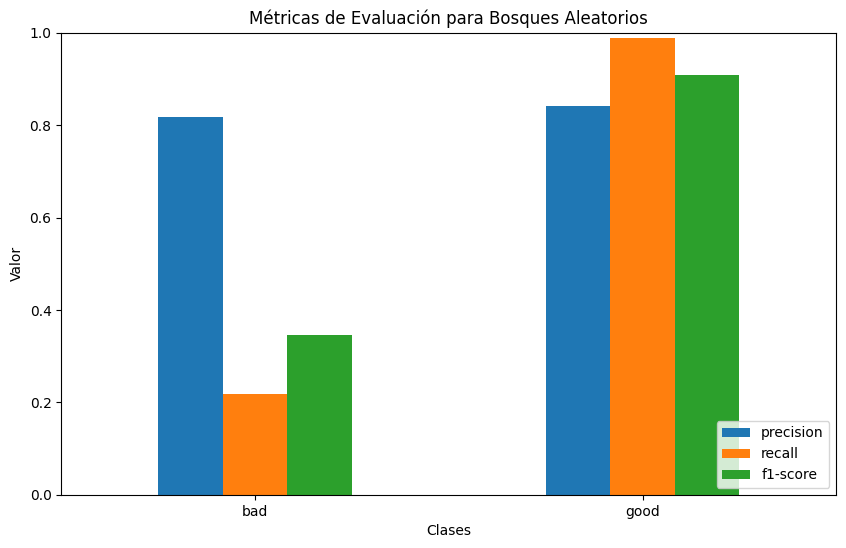

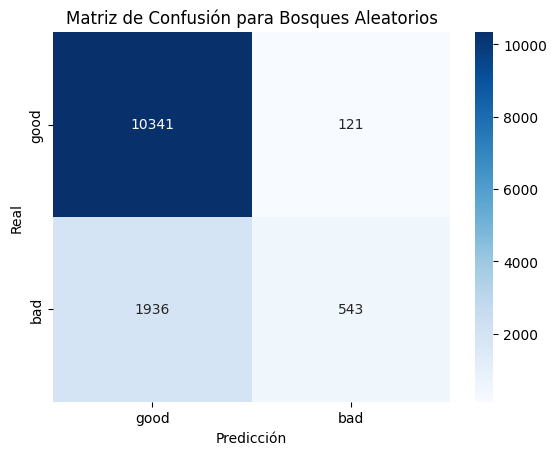

In [23]:
# Evaluación del Modelo 2: Random Forest
graficar_metricas('Bosques Aleatorios', y_test, y_pred2)
graficar_matriz_confusion('Bosques Aleatorios', y_test, y_pred2)

El modelo Random Forest muestra un buen rendimiento general, especialmente en la identificación de reseñas positivas. Sin embargo, tiene dificultades significativas para identificar correctamente las reseñas negativas, lo que se refleja en el bajo recall y F1-score para la clase "bad". Basado en las métricas y la matriz de confusión, el modelo de Bosques Aleatorios es menos equilibrado en comparación con el modelo de Regresión Logística.

Algo que me sorprende de este modelo es que tenga tan buena precisión y tan bajo recall y F1-score. Investigando, he llegado a la conclusión de que esto sugiere que el modelo es muy conservadore al predecir la clase bad, es decir, solo predice cuando está muy seguro, por lo que predice pocas veces la palabra bad y por eso el recall es tan malo, pero cuando predice bad en la mayoría de casos acierta.

En resumen, considero que el mejor modelo sigue siendo la regresión logística aunque me parece curioso que ambos modelos se comporten mal clasificando como mala una reseña.

En mi opinión, creo que esto se debe a las conclusiones vistas en el EDA, ya que la mayoría de reseñas son buenas y es raro que cuando compres un música, no te guste el artista que estás escuchando, ya que lo más probable es que seas su fan. Por ello, considero que los datos tienen un gran sesgo provocado por el tipo de producto que e está viendo y hace que inevitablemnte el modelo sea muy conservador con la clase bad, ya que realmente hay pocos datos de esta clase comparados con los que hay para reseñas de 4 y 5 estrellas.